#Steps to Run this:

1) To generate input randomly and get a hold of the input format , run the 1st cell

2) Click on refresh to view the 2 files that are generated :  

(i) auction_logs.txt --> intermediate calculations , final printed output

(same as visible in output cell)

(ii) auction_test_cases.csv ---> Experiments ( test cases ) generated randomly

Have a look at this to understand the input format , in case custom input is needed.




Experiment 1:
   experiment bidder_id type  bid_value
0           1  Bidder_1    s         25
1           1  Bidder_2    b         37
2           1  Bidder_3    t         44
3           1  Bidder_4    s         47
4           1  Bidder_5    t         26
VCG - Highest Bids: v1t=44, v1s=47, v1b=37
VCG - Second-Highest Bids: v2t=26, v2s=25, v2b=0
VCG Revenue: 51
VCG - Highest Bids: v1t=44, v1s=47, v1b=37
VCG - Second-Highest Bids: v2t=26, v2s=0, v2b=0
VCG Revenue: 26
VCG with Identity Manipulation - Total cost: 31
Alternate Mechanism - Highest bid: 47, Second-highest bid: 44
Alternate Mechanism Revenue: 44

Experiment 2:
   experiment bidder_id type  bid_value
0           2  Bidder_1    s         10
1           2  Bidder_2    t         93
2           2  Bidder_3    t         58
3           2  Bidder_4    t         37
4           2  Bidder_5    t         20
VCG - Highest Bids: v1t=93, v1s=10, v1b=0
VCG - Second-Highest Bids: v2t=58, v2s=0, v2b=0
VCG Revenue: 58
VCG - Highest Bids: v1t=93,

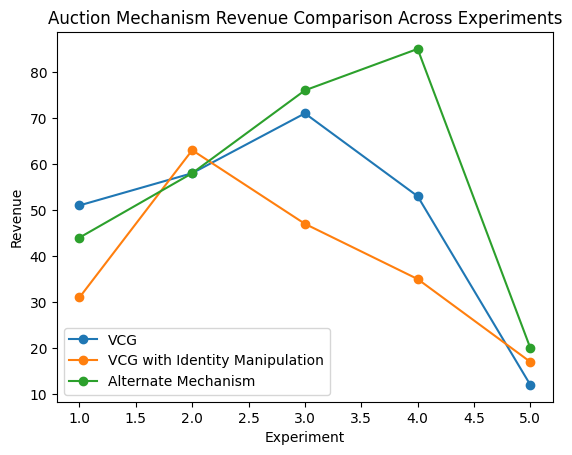

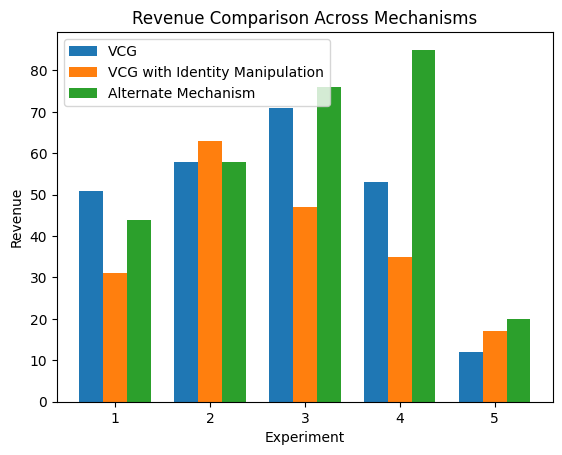

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# Global variable for storing logs
log_entries = []

# Test Case Generation
def generate_bids(num_bidders, max_bid_value, experiment_number):
    bids = []
    for i in range(num_bidders):
        bidder_type = random.choice(['t', 's', 'b'])
        bid_value = random.randint(1, max_bid_value)
        bids.append({
            'experiment': experiment_number,
            'bidder_id': f'Bidder_{i+1}',
            'type': bidder_type,
            'bid_value': bid_value
        })
    bids_df = pd.DataFrame(bids)
    return bids_df

# Helper function to log information
def log(entry):
    log_entries.append(entry)
    print(entry)

# Helper function to find the second-highest bid for each type
def get_second_highest(bids_df, ad_type):
    filtered_bids = bids_df[bids_df['type'] == ad_type]
    sorted_bids = filtered_bids.sort_values(by='bid_value', ascending=False)
    if len(sorted_bids) > 1:
        return sorted_bids.iloc[1]['bid_value']
    return 0

# Part (a): VCG Auction Mechanism
def vcg_revenue(bids_df):
    if len(bids_df[bids_df['type'] == 't']) > 0:
        v1t = bids_df[bids_df['type'] == 't']['bid_value'].max()
    else:
        v1t = 0

    if len(bids_df[bids_df['type'] == 's']) > 0:
        v1s = bids_df[bids_df['type'] == 's']['bid_value'].max()
    else:
        v1s = 0

    if len(bids_df[bids_df['type'] == 'b']) > 0:
        v1b = bids_df[bids_df['type'] == 'b']['bid_value'].max()
    else:
        v1b = 0

    v2t = get_second_highest(bids_df, 't')
    v2s = get_second_highest(bids_df, 's')
    v2b = get_second_highest(bids_df, 'b')

    vcg_revenue = v2t + v2s + v2b

    log(f"VCG - Highest Bids: v1t={v1t}, v1s={v1s}, v1b={v1b}")
    log(f"VCG - Second-Highest Bids: v2t={v2t}, v2s={v2s}, v2b={v2b}")
    log(f"VCG Revenue: {vcg_revenue}")

    return vcg_revenue

# Part (b): VCG Auction with Identity Manipulation
def vcg_with_identity(bids_df, manipulated_bidder_id, cost_alpha):
    manipulated_bidder = bids_df[bids_df['bidder_id'] == manipulated_bidder_id]

    if not manipulated_bidder.empty:
        identity_1 = manipulated_bidder.copy()
        identity_1['bidder_id'] = manipulated_bidder_id + "_1"
        identity_2 = manipulated_bidder.copy()
        identity_2['bidder_id'] = manipulated_bidder_id + "_2"
        identity_1['type'] = 't'
        identity_2['type'] = 's'

        manipulated_bids_df = pd.concat([bids_df, pd.DataFrame([identity_1.to_dict()]), pd.DataFrame([identity_2.to_dict()])], ignore_index=True)
        manipulated_bids_df = manipulated_bids_df[manipulated_bids_df['bidder_id'] != manipulated_bidder_id]

        vcg_revenue_manipulated = vcg_revenue(manipulated_bids_df)
        total_cost = vcg_revenue_manipulated + cost_alpha
        log(f"VCG with Identity Manipulation - Total cost: {total_cost}")
        return total_cost
    else:
        return 0

# Part (c): Alternate Auction Mechanism
def alternate_auction(bids_df):
    sorted_bids = bids_df.sort_values(by='bid_value', ascending=False)

    if len(sorted_bids) > 0:
        highest_bid = sorted_bids.iloc[0]
    else:
        return 0

    if len(sorted_bids) > 1:
        second_highest_bid = sorted_bids.iloc[1]
    else:
        second_highest_bid = {'bid_value': 0}

    revenue = second_highest_bid['bid_value']

    log(f"Alternate Mechanism - Highest bid: {highest_bid['bid_value']}, Second-highest bid: {second_highest_bid['bid_value']}")
    log(f"Alternate Mechanism Revenue: {revenue}")

    return revenue

# Save intermediate logs to a text file
def save_logs():
    with open('auction_logs.txt', 'w') as f:
        for entry in log_entries:
            f.write(entry + '\n')

# Save test case data as CSV
def save_csv(test_cases):
    test_cases.to_csv('auction_test_cases.csv', index=False)
    log("Test case data saved as auction_test_cases.csv")

# Additional visualizations: Bar chart for comparison
def bar_chart_comparison(vcg_results, identity_results, alt_results):
    experiments = range(1, len(vcg_results) + 1)
    width = 0.25

    plt.bar([x - width for x in experiments], vcg_results, width=width, label='VCG')
    plt.bar(experiments, identity_results, width=width, label='VCG with Identity Manipulation')
    plt.bar([x + width for x in experiments], alt_results, width=width, label='Alternate Mechanism')

    plt.xlabel('Experiment')
    plt.ylabel('Revenue')
    plt.title('Revenue Comparison Across Mechanisms')
    plt.legend()
    plt.show()

# Run multiple experiments and visualize
def run_experiments(num_experiments, num_bidders, max_bid_value, cost_alpha):
    vcg_results = []
    identity_results = []
    alt_results = []

    all_test_cases = pd.DataFrame()

    for i in range(num_experiments):
        log(f"\nExperiment {i + 1}:")
        bids_df = generate_bids(num_bidders, max_bid_value, i + 1)
        log(bids_df.to_string())

        # Accumulate test cases
        all_test_cases = pd.concat([all_test_cases, bids_df], ignore_index=True)

        # VCG Revenue
        vcg_rev = vcg_revenue(bids_df)
        vcg_results.append(vcg_rev)

        # VCG with Identity Manipulation
        identity_rev = vcg_with_identity(bids_df, 'Bidder_1', cost_alpha)
        identity_results.append(identity_rev)

        # Alternate Mechanism Revenue
        alt_rev = alternate_auction(bids_df)
        alt_results.append(alt_rev)

    # Save test cases as CSV
    save_csv(all_test_cases)

    # Save logs as text file
    save_logs()

    # Line chart visualization
    visualize_all_experiments(vcg_results, identity_results, alt_results)

    # Additional bar chart visualization
    bar_chart_comparison(vcg_results, identity_results, alt_results)

# Visualization: Compare different auction mechanisms for multiple experiments
def visualize_all_experiments(vcg_results, identity_results, alt_results):
    x = range(1, len(vcg_results) + 1)

    plt.plot(x, vcg_results, label='VCG', marker='o')
    plt.plot(x, identity_results, label='VCG with Identity Manipulation', marker='o')
    plt.plot(x, alt_results, label='Alternate Mechanism', marker='o')

    plt.xlabel('Experiment')
    plt.ylabel('Revenue')
    plt.title('Auction Mechanism Revenue Comparison Across Experiments')
    plt.legend()
    plt.show()

# Running the experiments
run_experiments(num_experiments=5, num_bidders=5, max_bid_value=100, cost_alpha=5)


#Note :

Use this to provide custom input (formatted csv file based on the sample input format)

Can also be used to recreate experiments.

Reading test cases from auction_test_cases.csv

Experiment 1:
   experiment bidder_id type  bid_value
0           1  Bidder_1    s         25
1           1  Bidder_2    b         37
2           1  Bidder_3    t         44
3           1  Bidder_4    s         47
4           1  Bidder_5    t         26
VCG - Highest Bids: v1t=44, v1s=47, v1b=37
VCG - Second-Highest Bids: v2t=26, v2s=25, v2b=0
VCG Revenue: 51
VCG - Highest Bids: v1t=44, v1s=47, v1b=37
VCG - Second-Highest Bids: v2t=26, v2s=0, v2b=0
VCG Revenue: 26
VCG with Identity Manipulation - Total cost: 31
Alternate Mechanism - Highest bid: 47, Second-highest bid: 44
Alternate Mechanism Revenue: 44

Experiment 2:
   experiment bidder_id type  bid_value
5           2  Bidder_1    s         10
6           2  Bidder_2    t         93
7           2  Bidder_3    t         58
8           2  Bidder_4    t         37
9           2  Bidder_5    t         20
VCG - Highest Bids: v1t=93, v1s=10, v1b=0
VCG - Second-Highest Bids: v2t=58, v2s=0, v2

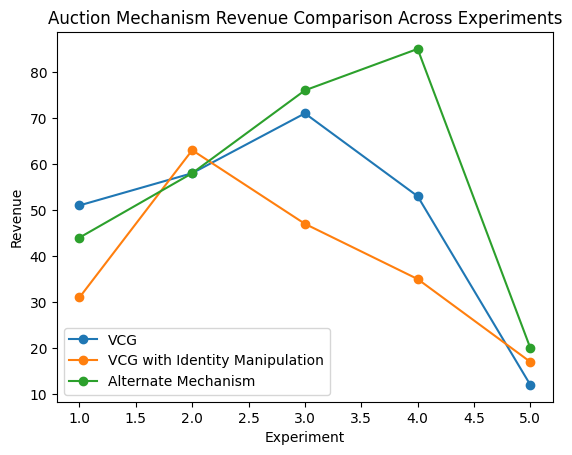

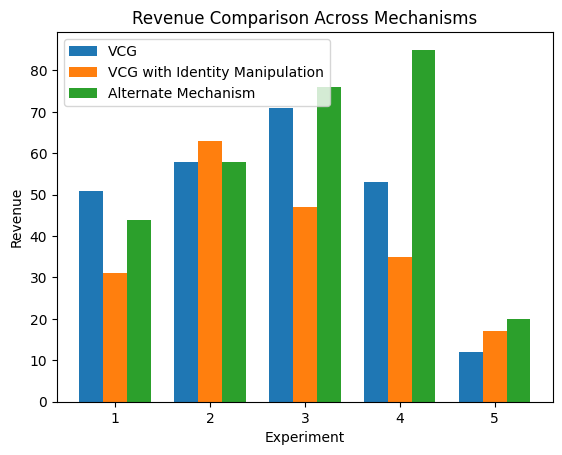

In [4]:
# Run experiment from a predefined CSV file
def run_experiment_from_csv(csv_file):
    log(f"Reading test cases from {csv_file}")

    # Read the test case data from CSV file
    test_cases_df = pd.read_csv(csv_file)

    # Group by experiment to handle multiple experiments in the same CSV
    grouped_experiments = test_cases_df.groupby('experiment')

    vcg_results = []
    identity_results = []
    alt_results = []

    # Iterate through each experiment group
    for experiment_number, bids_df in grouped_experiments:
        log(f"\nExperiment {experiment_number}:")
        log(bids_df.to_string())

        # VCG Revenue
        vcg_rev = vcg_revenue(bids_df)
        vcg_results.append(vcg_rev)

        # VCG with Identity Manipulation
        identity_rev = vcg_with_identity(bids_df, 'Bidder_1', cost_alpha=5)
        identity_results.append(identity_rev)

        # Alternate Mechanism Revenue
        alt_rev = alternate_auction(bids_df)
        alt_results.append(alt_rev)

    # Line chart visualization
    visualize_all_experiments(vcg_results, identity_results, alt_results)

    # Additional bar chart visualization
    bar_chart_comparison(vcg_results, identity_results, alt_results)

    # Save logs as text file
    save_logs()

# Example usage
run_experiment_from_csv('auction_test_cases.csv')
